In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
import warnings
from matplotlib import pyplot as plt
from matplotlib import axes
warnings.simplefilter(action='ignore')
%matplotlib inline

provinces = [10, 41, 50, 70, 90]

which_model = 'hist_avg'

folder = '../../output/' + which_model + '/all_prov_monthly/all_prov_monthly_'

In [48]:
# loads the error dataframe
def load_error_df(folder, how_many_years_out=1):
    # load the data
    file_path = folder + str(how_many_years_out) + '/monthly_errors_' + str(how_many_years_out) + '.csv'
    error_df = pd.read_csv(file_path)
    error_df['province'] = error_df['province'].astype(int)
    error_df['year'] = error_df['year'].astype(int)
    error_df['peak_month_error'] = error_df['peak_month_error'].astype(int)
    
    return error_df

In [49]:
# makes a graph for specified province, however many years out
def make_a_graph(province, df, how_many_years_out=1):
    prov_df = df.loc[df['province'] == province]
    ax = sns.barplot(x='year', y='monthly_case_rmse', data=prov_df, palette="Blues_d", ci=0)
    ax.set(xlabel='Year', ylabel='RMSE for Monthly Case Counts')
    plt.title('Province ' + str(province) + ', ' + str(how_many_years_out) + ' Year(s) Out')
    plt.show()

In [50]:
# makes a graph for each province for provinces made the specified number of years out
def make_a_buncha_graphs(how_many_years_out=1):
    monthly_errors = load_error_df(folder, how_many_years_out)

    for province in provinces:
        make_a_graph(province, monthly_errors, how_many_years_out)

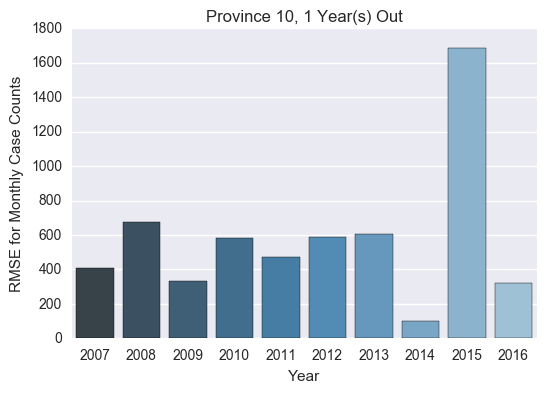

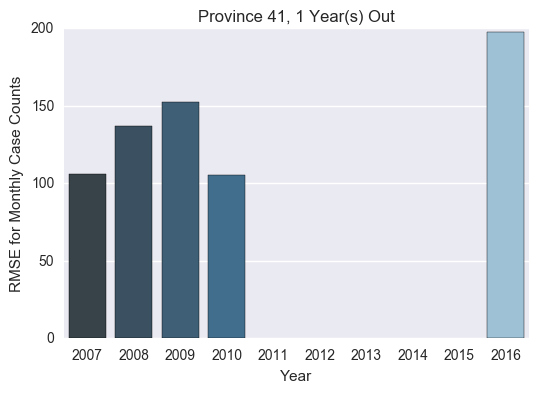

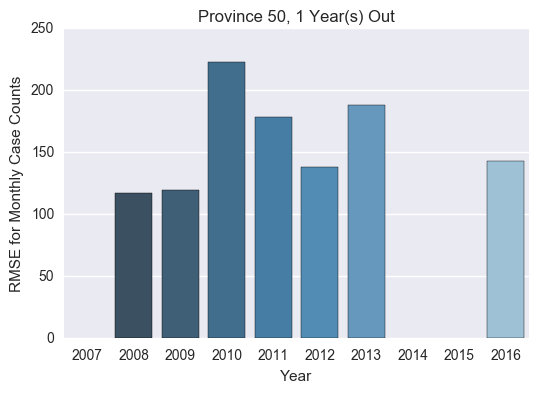

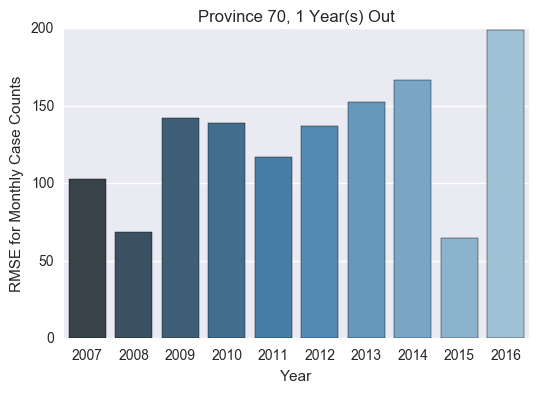

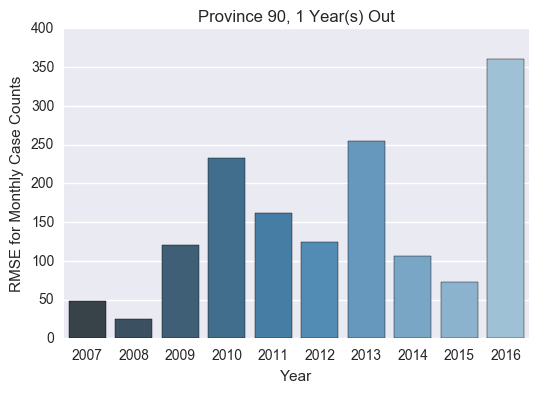

In [52]:
make_a_buncha_graphs(1)

In [53]:
# load all the data and combine into one dataframe
# make a column for the "trajectories" should be able to track the error when training on the same number of months
# the color of the error bars should be the same for all the data trained on 2006, then all the data trained on 2006+2007, etc

all_years_out_df = pd.DataFrame(columns=['province','year','monthly_case_rmse','year_total_error','peak_error','peak_month_error', 'how_many_years_out'])
trajectory_index_list = []

for i in range(1, 11):
    df = load_error_df(folder, i)
    df['how_many_years_out'] = i
    all_years_out_df = pd.concat([all_years_out_df, df])
    
    trajectory_index_list.append(np.arange(i, 11))

traj_ind_all_prov = np.repeat(trajectory_index_list, 5)
traj_ind_all_prov = np.concatenate(traj_ind_all_prov)
all_years_out_df['trajectory'] = traj_ind_all_prov

all_years_out_df['province'] = all_years_out_df['province'].astype(int)
all_years_out_df['year'] = all_years_out_df['year'].astype(int)
all_years_out_df['peak_month_error'] = all_years_out_df['peak_month_error'].astype(int)
all_years_out_df['how_many_years_out'] = all_years_out_df['how_many_years_out'].astype(int)
all_years_out_df.head()

,province,year,monthly_case_rmse,year_total_error,peak_error,peak_month_error,how_many_years_out,trajectory
0,10,2007,407.704660,4469.800000,575.600000,5,1,1
1,10,2008,675.741442,7420.233333,1123.900000,4,1,2
2,10,2009,332.006498,3523.166667,524.266667,4,1,3
3,10,2010,582.215178,5836.628947,970.750000,3,1,4
4,10,2011,469.615959,5015.330000,752.640000,2,1,5


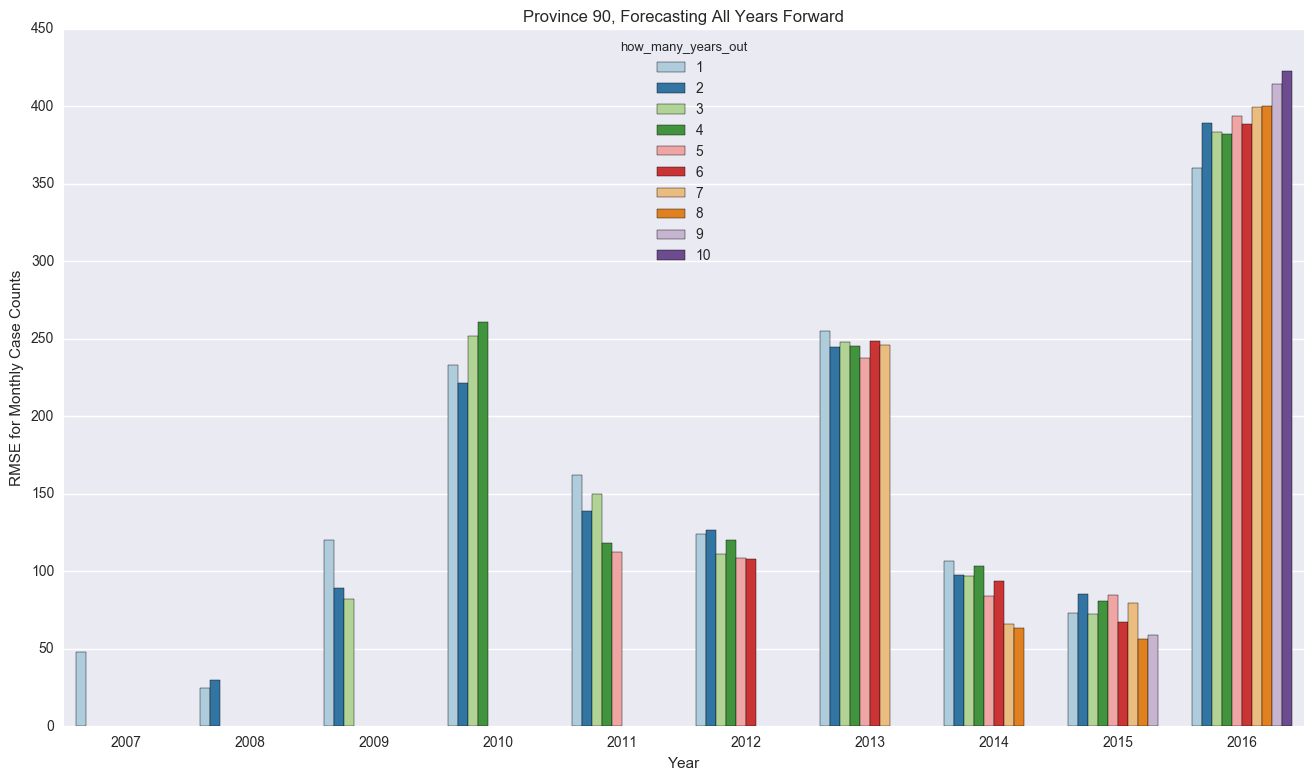

In [54]:
province = 90

prov_df = all_years_out_df.loc[all_years_out_df['province'] == province]

sns.set()
plt.subplots(figsize=(16,9))
# plt.rcParams['axes.facecolor'] = 'white'
# hue is either trajectory or how_many_years_out
ax = sns.barplot(x='year', y='monthly_case_rmse', data=prov_df, ci=0, hue='how_many_years_out', palette='Paired')
ax.set(xlabel='Year', ylabel='RMSE for Monthly Case Counts')
plt.title('Province ' + str(province) + ', ' + 'Forecasting All Years Forward')
plt.show()

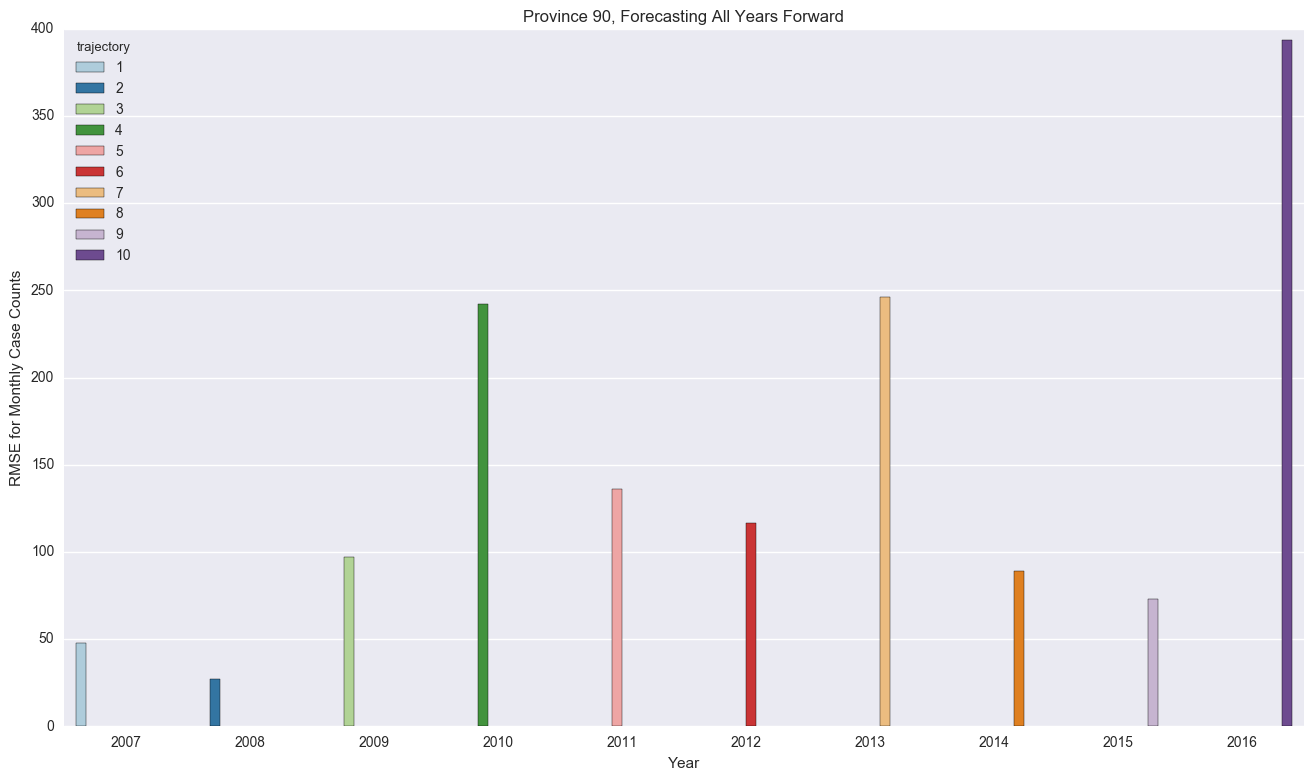

In [55]:
plt.subplots(figsize=(16,9))
# plt.rcParams['axes.facecolor'] = 'white'
# hue is either trajectory or how_many_years_out
ax = sns.barplot(x='year', y='monthly_case_rmse', data=prov_df, ci=0, hue='trajectory', palette='Paired')
ax.set(xlabel='Year', ylabel='RMSE for Monthly Case Counts')
plt.title('Province ' + str(province) + ', ' + 'Forecasting All Years Forward')
plt.show()